# Spambase Project - Intro to ML Final

## Leon Huang and Leon Jiao

### Introduction
The following project will center around predicting whether an email is a spam email based off of characters, words, and phrases contained within the email. Throughout, we will be using machine learning techniques that we have learned during the INFO 1998 course. 

[Insert some Shit]

#### Source

[fill in later]

### Preliminary Steps: Data at a First Glance

In [55]:
#First, we import the necessary packages

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Read the Feature names

In [10]:
with open("spambase.names", "r") as namesFile:
    namesInfo = namesFile.readlines()

for index, line in enumerate(namesInfo):
    print(index, "\t", line)
    
# By inspection, actual names begin at index 33

0 	 | SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)

1 	 |

2 	 | 48 continuous real [0,100] attributes of type word_freq_WORD 

3 	 | = percentage of words in the e-mail that match WORD,

4 	 | i.e. 100 * (number of times the WORD appears in the e-mail) / 

5 	 | total number of words in e-mail.  A "word" in this case is any 

6 	 | string of alphanumeric characters bounded by non-alphanumeric 

7 	 | characters or end-of-string.

8 	 |

9 	 | 6 continuous real [0,100] attributes of type char_freq_CHAR

10 	 | = percentage of characters in the e-mail that match CHAR,

11 	 | i.e. 100 * (number of CHAR occurences) / total characters in e-mail

12 	 |

13 	 | 1 continuous real [1,...] attribute of type capital_run_length_average

14 	 | = average length of uninterrupted sequences of capital letters

15 	 |

16 	 | 1 continuous integer [1,...] attribute of type capital_run_length_longest

17 	 | = length of longest uninterrupted sequence of capital letters

18 	 |

19 	 | 1 continuo

In [11]:
# This yields our 57 features of interest
featuresList = namesInfo[33:]
featureNames = [name[: name.index(":")] for name in featuresList]
featureNames.append("spam_class")
featureNames

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

### Load the data 

In [12]:
data = pd.read_csv("spambase.data", names=featureNames)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [13]:
# Get data statistics
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [52]:
data.shape

(4601, 58)

Here, we can see that there are 4601 data points for us to analyze. 

# Visualization

In [14]:
correlation = data.corr()
correlation.style.background_gradient(cmap='coolwarm')

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.21145

#### We see that our top 5 correlated features are word_freq_your, word_freq_000, word_freq_remove, char_freq_$, and word_freq_you.

In [15]:
features_5 = ["word_freq_your", "word_freq_000", "word_freq_remove", "char_freq_$", "word_freq_you"]
X = data[features_5]
Y = data["spam_class"]

## Machine Learning Models

With these five features, we are now ready to do machine learning!

We will look at five models: A Decision Tree Classifier, a K-Fold Cross Validator, a K-Neighbors Classifier, a Random Forest Classifier, and a Logistic Regression

First, let's split the data using train_test_split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#A list to save the accuracies of different models for a later visualization
accuracies = []

First, a Decision Tree Classifier

We first need to find the most optimal depth that maximizes the accuracy of the model. 

In [46]:
from sklearn.tree import DecisionTreeClassifier

best_depth = 1

for x in range(1, 100):
    model = DecisionTreeClassifier(max_depth = x)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    score = accuracy_score(prediction, y_test)
    
    if(score > best_accuracy):
        best_depth = x
        best_accuracy = score
        
accuracies.append(best_accuracy)
print("The Decision Tree is most accurate when it has depth " + str(best_depth))
print("The accuracy of the Decision Tree is " + str(best_accuracy))

The Decision Tree is most accurate when it has depth 6
The accuracy of the Decision Tree is 0.8523344191096635


In [19]:
from sklearn.neighbors import KNeighborsClassifier

kmodel = KNeighborsClassifier(n_neighbors = 5)
kmodel.fit(x_train, y_train)
predictions = kmodel.predict(x_test)

accuracies.append(accuracy_score(predictions, y_test))
print("Accuracy Score with a KNearestNeighbors Classifier:", accuracy_score(predictions, y_test))

Accuracy Score with a KNearestNeighbors Classifier: 0.8219326818675353


In [29]:
from sklearn.ensemble import RandomForestClassifier

rmodel = RandomForestClassifier()
rmodel.fit(x_train, y_train)
rpredictions = rmodel.predict(x_test)

accuracies.append(accuracy_score(rpredictions, y_test))
print("Accuracy Score with a Random Forest Classifier:", accuracy_score(rpredictions, y_test))

Accuracy Score with a Random Forest Classifier: 0.8545059717698155


In [21]:
from sklearn.linear_model import LogisticRegression

lmodel = LogisticRegression()
lmodel.fit(x_train, y_train)
lpredictions = lmodel.predict(x_test)

accuracies.append(accuracy_score(lpredictions, y_test))
print("Accuracy Score with a Logistic Regression:", accuracy_score(lpredictions, y_test))

Accuracy Score with a Logistic Regression: 0.8284473398479913


In [22]:
#Create a Bar Plot with all the accuracies

From the Bar Plot, we can see that the Random Forest Classifier is clearly the most accurate, with the Logistic Regression and KNeighbors classifiers neck and neck for second. While the Decision Tree classifier has a higher score, we instead look at the Decision Tree classifier with K-Fold as it is less prone to overfitting and can see that it is the least accurate. 

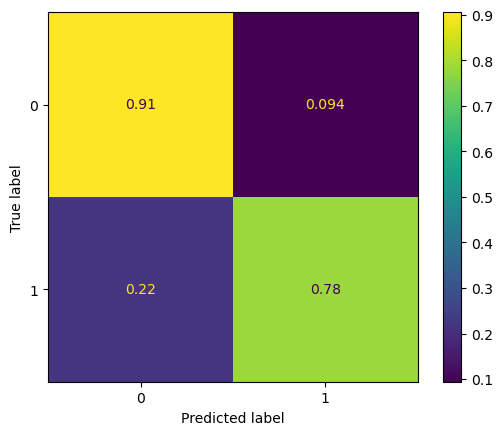

In [48]:

#Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rmodel, x_test, y_test, normalize='true')

Total Data Points: 921
KNeighbors True Negative Rate: 482
KNeighbors True Positive Rate: 275
KNeighbors False Negative Rate: 115
KNeighbors False Positive Rate: 49


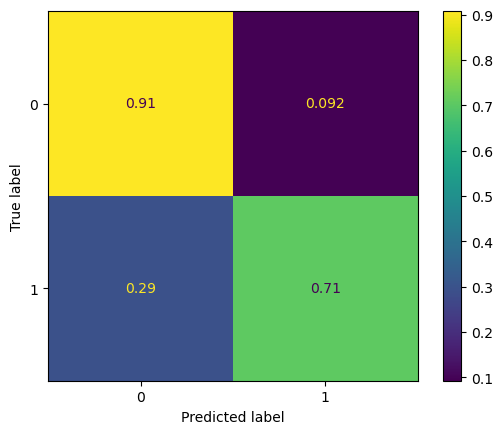

In [49]:
#KNeighbors Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, kmodel.predict(x_test)).ravel()

print("Total Data Points: " + str(tn + fp + fn + tp))
print("KNeighbors True Negative Rate: " + str(tn))
print("KNeighbors True Positive Rate: " + str(tp))
print("KNeighbors False Negative Rate: " + str(fn))
print("KNeighbors False Positive Rate: " + str(fp))

ConfusionMatrixDisplay.from_estimator(kmodel, x_test, y_test, normalize='true')

Total Data Points: 921
Logistic Regression True Negative Rate: 505
Logistic Regression True Positive Rate: 258
Logistic Regression False Negative Rate: 132
Logistic Regression False Positive Rate: 26


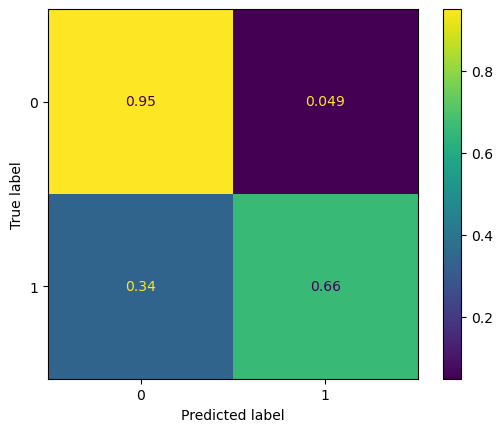

In [50]:
#Logistic Regression Confusion Matrix

tn, fp, fn, tp = confusion_matrix(y_test, lmodel.predict(x_test)).ravel()

print("Total Data Points: " + str(tn + fp + fn + tp))
print("Logistic Regression True Negative Rate: " + str(tn))
print("Logistic Regression True Positive Rate: " + str(tp))
print("Logistic Regression False Negative Rate: " + str(fn))
print("Logistic Regression False Positive Rate: " + str(fp))

ConfusionMatrixDisplay.from_estimator(lmodel, x_test, y_test, normalize='true')

## Observations from Confusion Matrix

The first observation that we 